# Proximal Denoising

## Problem

We are interested in denoising an image by looking for the solution to the following optimization problem:
$$
\underset{x \in \mathbb{R}^N}{minimize}\hspace{2mm}\frac{1}{2}||x - y||^2 + f\left(Lx \right)
$$
where $y \in \mathbb{R}^N$ is the noisy image, $L \in \mathbb{R}^{N \times N}$ an orthogonal transform and f a separable penalty function of the form:
$$
\forall u = \left(u_i \right)_{1 \le i \le N} \in \mathbb{R}^N \hspace{5mm} f(u) = \sum _{i=1}^N f _{i}(u _i)
$$
Where $\forall i \in \{1, \ldots , N \} \hspace{2mm} f_i \in \Gamma_0\left(\mathbb{R} \right)$

## Question 1

Let's show that $f \circ L \in \Gamma_0\left(\mathbb{R}^N \right)$:

Let $\left(b_i \right)_{1 \le i \le N}$ be the canonical orthonormal basis of $\mathbb{R}^N$ and $u = \left(u_i \right)_{1 \le i \le N} \in \mathbb{R}^N$ such that $u = \sum_{i=1}^N u_i b_i$

Then $f \circ L(u) = \sum_{i=1}^N f_i\left(\langle Lu | b_i \rangle \right)$ and $f \circ L(u) = \sum_{i=1}^N f_i\left(\langle u | L^Tb_i \rangle \right)$ because $L$ is orthogonal in $\mathbb{R}^N$ finite-dimensional

Let $\phi_i = f_i \circ \langle \cdot | L^T b_i \rangle \hspace{2mm} \forall i \in \{1, \ldots, N \}$, for $i \in \{1, \ldots, N \}$ we have:

- $\phi_i$ is proper because $dom\left(\langle \cdot, L^T b_i \rangle \right) = \mathbb{R}^N$ and $f_i \in \Gamma_0 \left(\mathbb{R}^N \right)$ proper.
- Let $u \in \mathbb{R}^N$ and $(u_n)_{n \in \mathbb{N}}$ be a sequence of vectors in $\mathbb{R}^N$ such that $u_n \underset{n \infty}{\longrightarrow} u$, for $i \in \{1, \ldots N \}$ we have $\langle u_n | L^T b_i \rangle \underset{n \infty}{\longrightarrow} \langle u | L^T b_i \rangle$ becausse $\langle \cdot | L^T b_i \rangle$ is continuous (linear in finite dimension). We have $f_i$ lsc, then $\underset{n \infty}{lim}\hspace{2mm} f_i \left(\langle u_n | L^T b_i \rangle \right) \ge f_i \left(\langle u | L^T b_i \rangle \right)$ which means $\underset{n \infty}{lim}\hspace{2mm} \phi_i \left(u_n \right) \ge \phi_i \left(u \right)$ and we conclude that $\phi_i$ is lsc.

Let $(u, v) \in \mathbb{R}^N \times \mathbb{R}^N$ and $\alpha \in \left[0, 1 \right]$, $\forall i \in \{ 1, \ldots , N\}$
\begin{align}
\phi_i \left(\alpha u + (1 - \alpha)v \right) &= f_i \left(\langle \alpha u + (1 - \alpha)v | L^T b_i \rangle \right) \\
&= f_i \left(\alpha u_i + \left(1 - \alpha \right)v_i \right) \\
&\le \alpha f_i(u_i) + (1 - \alpha)f_i(v_i)
\end{align}
Becaue $f_i$ is convex. And we have then
\begin{align}
\phi_i \left(\alpha u + (1 - \alpha)v \right) &\le \alpha f_i\left(\langle u | L^T b_i \rangle\right) + (1 - \alpha)f_i\left(\langle v | L^T b_i \rangle\right) \\
&\le \alpha \phi(u) + (1 - \alpha)\phi(v)
\end{align}
Then $\phi_i$ is convex, and we conclude that $\forall i \in \{1, \ldots, N \} \hspace{2mm} \phi_i \in \Gamma_0\left(\mathbb{R}^N \right)$

We have $f \circ L = \sum_{i=1}^N \phi_i$ which is a finite sum of functions in $\Gamma_0\left(\mathbb{R}^N \right)$

**Conclusion** : $f \circ L \in \Gamma_0\left(\mathbb{R}^N \right)$ and the problem amounts to calculating $prox_{f \circ L}(y)$

## Question 2

We have $f \in \Gamma_0\left(\mathbb{R}^N \right)$

$L \in \mathbb{R}^{N \times N}$ orthogonal transformation in $\mathbb{R}^N$ then $LL^T = Id$, we have then:
\begin{align}
prox_{f \circ L}(y) &= y - L^{-1}\left(Ly - prox_{f}\left(Ly \right) \right)\\
                    &= L^{-1}prox_f\left(Ly \right)
\end{align}

## Question 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pywt

Here is a photo of Florence

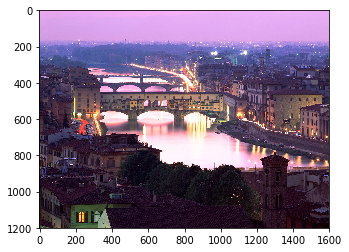

In [2]:
img = plt.imread('florence.jpg')
plt.imshow(img)
plt.show()

We add a centered Gaussian noise with a standard deviation $\sigma = 30$. Notice that the loaded image is an array of 8-bit unsigned integers, therefore we need to clip the values in the range $\{0, \ldots, 255 \}$ after adding the noise, otherwise values are take modulo $256$ which is not convenient; and then we convert the resulting array into an array of 8-bit unsigned integers.

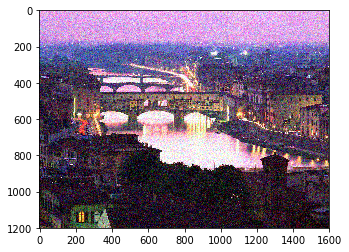

In [3]:
y = np.clip(img + np.random.normal(0, 30, img.shape), 0, 255).astype(np.uint8)
plt.imshow(y)
plt.show()

## Question 4

Let's consider $L$ a 2D orthonormal wavelet decomposition, since we are looking for $L^{-1}prox_f\left(Ly \right)$, we compute the approximation coefficients and detail coefficients of $Ly$

In [29]:
coeffs = pywt.wavedec2(y, 'db8', axes=(0, 1), level=2)

We consider the case when
$
\forall i \in \{1, \ldots, N \} \hspace{2mm}
f_i = 
\begin{cases}
0 \text{ if } i \in \mathbb{K} \\
\phi \text{ otherwise}
\end{cases}
$
where $\mathbb{K}$ is the set of indices of the approximation coefficients and $\phi = \chi |.|^q$ and $q \in \left\{1, \frac{4}{3}, \frac{3}{2}, 2, 3, 4 \right\}$, $\chi$ is a positive constant.

This formulation means that we only penalize the detail coefficients.

In [30]:
def prox(q, M, x):
    """
    Description
    -------------
    This function computes the proximity operator of M|.|^q at x
    
    Parameters
    -------------
    q : Float in {1, 4/3, 3/2, 2, 3, 4}
    x : np.array, array of the real numbers we apply the proximity operator at.
    M : Float, positive penalty constant.
    
    Returns
    -------------
    Float, the result of applying the proximity operator.
    """
    
    if q == 1:
        return np.sign(x)*np.maximum(abs(x) - M, 0)
        
    elif q == 4/3:
        epsilon = np.sqrt(x**2 + 256*M**3/729)
        return x + 4*M*((epsilon - x)**(1/3) - (epsilon + x)**(1/3))/(3*2**(1/3))
    
    elif q == 3/2:
        return x + 9*M**2*np.sign(x)*(1 - np.sqrt(1 + 16*abs(x)/(9*M**2)))/8
    
    elif q == 2:
        return x/(1 + 2*M)
    
    elif q == 3:
        return np.sign(x)*(np.sqrt(1 + 12*M*abs(x)) - 1)/(6*M)
    
    elif q == 4:
        epsilon = np.sqrt(x**2 + 1/(27*M))
        return ((epsilon + x)/(8*M))**(1/3) - ((epsilon - x)/(8*M))**(1/3)

In [31]:
def reconstruct(q, M, coeffs):
    """
    Description
    -------------
    Apply prox(q, M, .) to the detail coefficients of list coeffs and reconstruct the signal.
    
    Patrameters
    -------------
    q      : Float in {1, 4/3, 3/2, 2, 3, 4}
    M      : Float, positive penalty constant.
    coeffs : List containing the coefficients of the 2D wavelet decomposition of the image.
    
    Return
    -------------
    np.array that we need to convert to PIL image
    """
    coeffs_rec = [coeffs[0]]
    for i in range(1, len(coeffs)):
        coeffs_rec.append((prox(q, M, coeffs[i][0]), prox(q, M, coeffs[i][0]), prox(q, M, coeffs[i][0])))
        
    return np.clip(pywt.waverec2(coeffs_rec, 'db8', axes = (0, 1)), 0, 255).astype(np.uint8)

Let's search for $q$ and $\chi$ that minimize the mean squared error with respect to the original image in the following grid $q \in \left[1, \frac{4}{3}, \frac{3}{2}, 2, 3, 4 \right]$ and $\chi \in \left[1, 10, 100, 1000 \right]$

Notice that when computing the mean squared error, we convert the dtypes of both the original image and the reconstructed image into 16-bit integers to avoid the problem of taking the modulo of $256$ when calculating the difference between the two images.

In [40]:
q_values = [1, 4/3, 3/2, 2, 3, 4]
M_values = [1, 10, 100, 1000]
scores = {} # We store the mean squared errors with their corresponding (q, M) tuples in this dictionnary
for q in q_values:
    for M in M_values:
        scores[(q, M)] = np.linalg.norm(np.clip(img.astype(np.int16) - reconstruct(q, M, coeffs).astype(np.int16), 0, 255))**2/img.size
        

In [41]:
q, M = min(scores, key = scores.get)
print("The minimum squared error : %.4f" %scores[(q, M)])

The minimum squared error : 114.3354


We get the following denoised image.

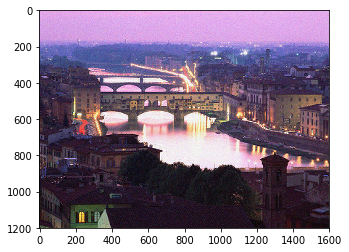

In [42]:
plt.imshow(reconstruct(q, M, coeffs))
plt.show()